In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

In [4]:
titanic = pd.read_csv('C:\\Users\\ASUS\\Desktop\\titanic_train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


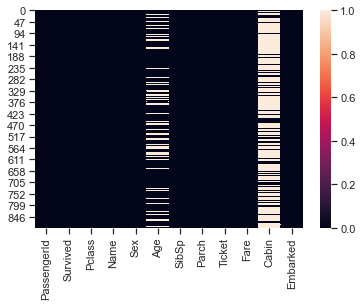

In [6]:
sns.heatmap(titanic.isna())
plt.show()

In [7]:
titanic.isna().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
titanic['Cabin'].value_counts(dropna=False)

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
B102             1
A34              1
C54              1
D6               1
C50              1
Name: Cabin, Length: 148, dtype: int64

In [11]:
titanic.columns = titanic.columns.str.lower()

In [12]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [13]:
titanic.drop(['cabin', 'passengerid', 'ticket'], axis = 1, inplace = True)

## __FEATURE ENGINEERING__

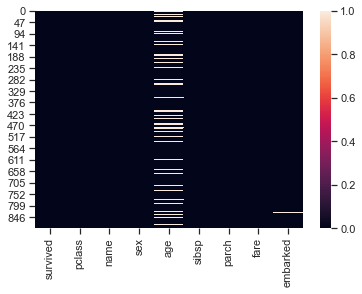

In [14]:
sns.heatmap(titanic.isna())
plt.show()

## __NORMALITY TEST AGE__

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


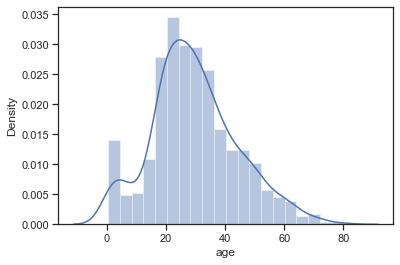

In [15]:
sns.distplot(titanic['age'])
plt.show()

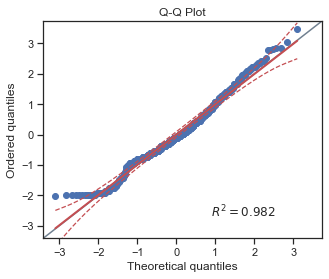

In [16]:
pg.qqplot(titanic['age'], dist='norm')

## __EMBARKED__

In [18]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [19]:
titanic[titanic['embarked'].isna() == True]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


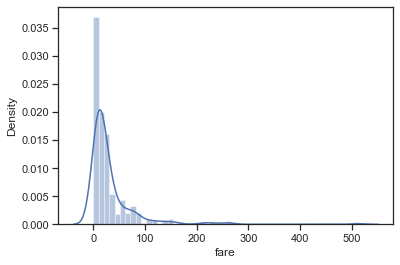

In [22]:
sns.distplot(titanic.fare)

In [25]:
pd.crosstab(index=titanic.embarked, columns=titanic.pclass, values=titanic.fare, aggfunc=np.mean)

pclass,1,2,3
embarked,,,
C,104.718529,25.358335,11.214083
Q,90.000000,12.350000,11.183393
S,70.364862,20.327439,14.644083


In [26]:
pd.crosstab(index=titanic.embarked, columns=titanic.sex, normalize=True)

sex,female,male
embarked,,
C,0.082115,0.106862
Q,0.040495,0.046119
S,0.228346,0.496063


- Age impute with mean
- Embarked impute with S

## __NAME__

In [28]:
titanic.name.nunique()

891

In [29]:
titanic['name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: name, Length: 891, dtype: object

In [31]:
titanic['name'].str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: name, Length: 891, dtype: object

In [32]:
titanic['name'].str.split(',').str[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: name, Length: 891, dtype: object

In [33]:
titanic['name'].str.split(',').str[1].str.split('.')

0                                 [ Mr,  Owen Harris]
1      [ Mrs,  John Bradley (Florence Briggs Thayer)]
2                                     [ Miss,  Laina]
3              [ Mrs,  Jacques Heath (Lily May Peel)]
4                               [ Mr,  William Henry]
                            ...                      
886                                   [ Rev,  Juozas]
887                          [ Miss,  Margaret Edith]
888                [ Miss,  Catherine Helen "Carrie"]
889                               [ Mr,  Karl Howell]
890                                   [ Mr,  Patrick]
Name: name, Length: 891, dtype: object

In [34]:
titanic['name'].str.split(',').str[1].str.split('.').str[0]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: name, Length: 891, dtype: object

In [36]:
titanic['title'] = titanic['name'].str.split(',').str[1].str.split('.').str[0]

In [37]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [39]:
titanic.name.nunique()

891

In [40]:
titanic.title.nunique()

17

## __EDA__

In [42]:
titanic.head() #Melakukan EDA selalu thdp target

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [91]:
titanic.drop(['name'], axis = 1, inplace = True)

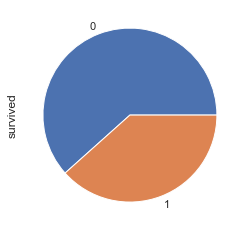

In [46]:
titanic.survived.value_counts(normalize = True). plot(kind='pie')
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


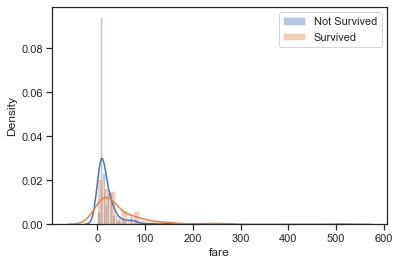

In [48]:
sns.distplot(titanic[titanic['survived'] == 0]['fare'], label = 'Not Survived')
sns.distplot(titanic[titanic['survived'] == 1]['fare'], label = 'Survived')
plt.legend()
plt.show()

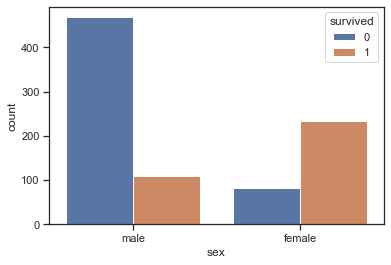

In [54]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.show()

In [51]:
pd.crosstab(index = titanic['sex'], columns = titanic['survived'], normalize=0)

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


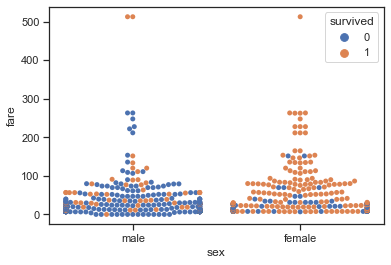

In [52]:
sns.swarmplot(y="fare", x="sex", hue="survived", data=titanic)


In [55]:
titanic['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [56]:
pd.crosstab(titanic['sibsp'], titanic['survived'], normalize=0)

survived,0,1
sibsp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


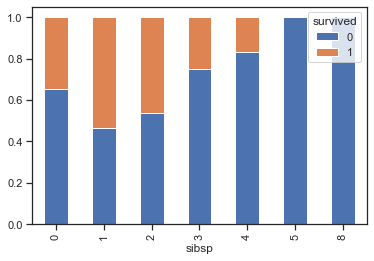

In [57]:
pd.crosstab(titanic['sibsp'], titanic['survived'], normalize=0).plot(kind = 'bar', stacked=True)

In [58]:
titanic[titanic['sibsp']==8]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,S,Master
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,S,Miss
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,S,Mr
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,S,Mr
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,S,Miss
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S,Mr
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.55,S,Miss


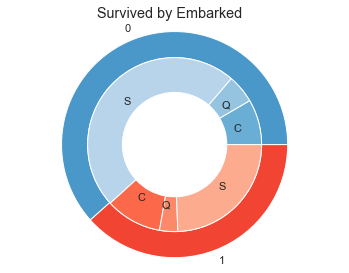

In [61]:
by_embarked = titanic.groupby('embarked')['survived'].value_counts().to_frame().rename(columns={'survived': 'freq'}).reset_index().sort_values('survived')

# Make data: I have 2 groups and 3 subgroups
group_names=titanic['survived'].value_counts().index
group_size=titanic['survived'].value_counts()
subgroup_names=by_embarked['embarked']
subgroup_size=by_embarked['freq']
 
# Create colors
a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Survived by Embarked')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

In [67]:
pd.crosstab(index=titanic['embarked'], columns=titanic['survived'], normalize=1)

survived,0,1
embarked,,
C,0.136612,0.273529
Q,0.085610,0.088235
S,0.777778,0.638235


In [68]:
titanic[titanic['embarked']=='S']['pclass'].value_counts()

3    353
2    164
1    127
Name: pclass, dtype: int64

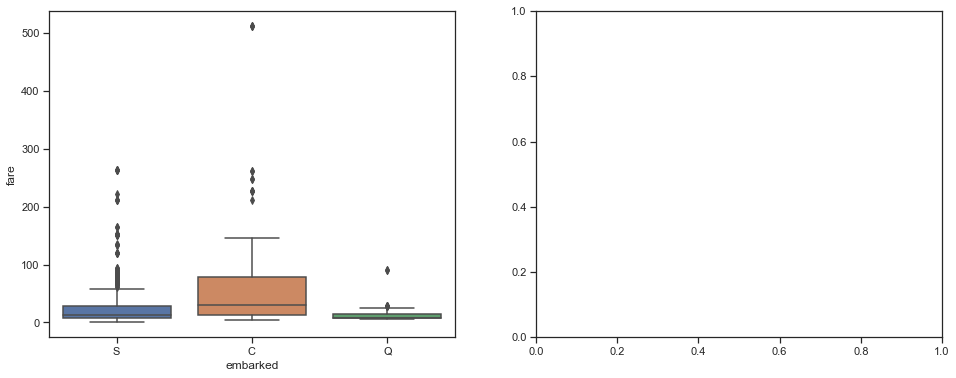

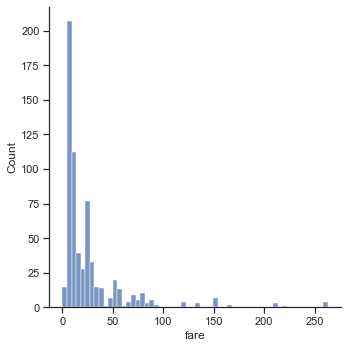

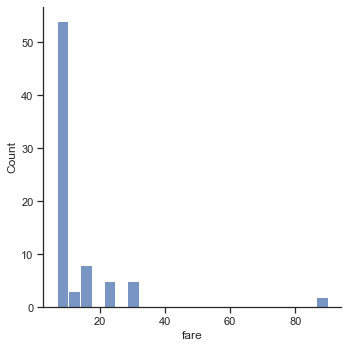

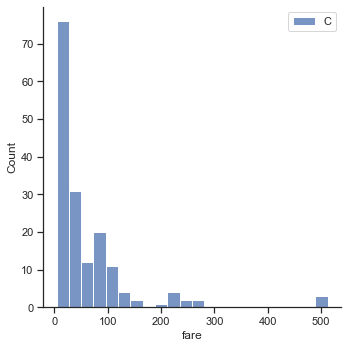

In [70]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(x='embarked', y='fare', data=titanic)

plt.subplot(122)
sns.displot(x=titanic[titanic['embarked']=='S']['fare'], label="S")
sns.displot(x=titanic[titanic['embarked']=='Q']['fare'], label="Q")
sns.displot(x=titanic[titanic['embarked']=='C']['fare'], label="C")

plt.legend()
plt.show()

Data Skew jadi pakai hipotesis testing yang Non Parametic

In [71]:
stats, p = mannwhitneyu(titanic[titanic['embarked']=="S"]['fare'], titanic[titanic['embarked']=="C"]['fare'], alternative='less')

if p< 0.05:
    print("Southampton median fare are less than Cherbourg")
else:
    print("Southampton median fare are equal than Cherbourg")


Southampton median fare are less than Cherbourg


In [72]:
stats, p = mannwhitneyu(titanic[titanic['embarked']=="S"]['fare'], titanic[titanic['embarked']=="Q"]['fare'], alternative='less')

if p< 0.05:
    print("Southampton median fare are less than Queenstown")
else:
    print("Southampton median fare are equal than Queenstown")


Southampton median fare are equal than Queenstown


In [74]:
pd.crosstab(index=titanic['embarked'], columns=titanic['sex'], normalize=0)

sex,female,male
embarked,,
C,0.434524,0.565476
Q,0.467532,0.532468
S,0.315217,0.684783


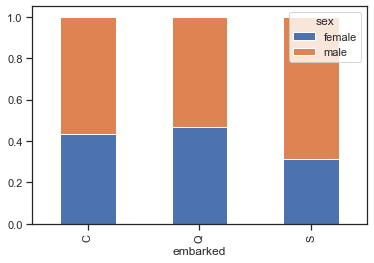

In [73]:
pd.crosstab(index=titanic['embarked'], columns=titanic['sex'], normalize=0).plot(kind='bar', stacked=True)

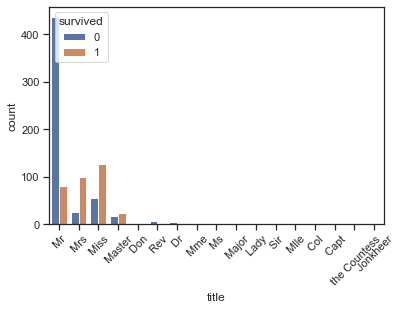

In [75]:
sns.countplot(x='title', hue='survived', data=titanic)
plt.xticks(rotation=45)
plt.show()

In [76]:
pd.crosstab(index=titanic['title'], columns=titanic['survived'], normalize=0)

survived,0,1
title,,
Capt,1.000000,0.000000
Col,0.500000,0.500000
Don,1.000000,0.000000
Dr,0.571429,0.428571
Jonkheer,1.000000,0.000000
Lady,0.000000,1.000000
Major,0.500000,0.500000
Master,0.425000,0.575000
Miss,0.302198,0.697802


In [77]:
pd.crosstab(index=titanic['title'], columns=titanic['survived'], normalize=0).sort_values(0, ascending=False)

survived,0,1
title,,
Capt,1.000000,0.000000
Don,1.000000,0.000000
Jonkheer,1.000000,0.000000
Rev,1.000000,0.000000
Mr,0.843327,0.156673
Dr,0.571429,0.428571
Major,0.500000,0.500000
Col,0.500000,0.500000
Master,0.425000,0.575000


## __MODELING__

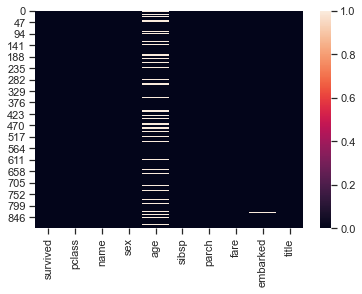

In [79]:
sns.heatmap(titanic.isna())

In [80]:
titanic.isna().sum()/len(titanic)*100

survived     0.000000
pclass       0.000000
name         0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
title        0.000000
dtype: float64

> ## Data Spliting

In [92]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.2, stratify=y)

> ## Pipeline Decision Tree

In [93]:
#impute age
numerical_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy = 'mean'))
])

#imput embarked dan onehot
onehot_pipeline = Pipeline([
    ('impute_cat', SimpleImputer(strategy='constant', fill_value = 'S')),
    ('onehot', OneHotEncoder(drop='first'))
])

#untuk title
binary_pipeline = Pipeline([
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('impute_pipe', numerical_pipeline, ['age']),
    ('onehot_pipe', onehot_pipeline, ['sex', 'embarked']),
    ('binary_pipe', binary_pipeline, ['title'])
], remainder = 'passthrough')

#model initializing
dtc = DecisionTreeClassifier(max_depth=5, random_state=1912)
smote = SMOTE()
rfe = RFE(estimator=dtc)

all_in_pipeline = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe), #rfe untuk mencari kolom terbaik
    ('resampling', smote),
    ('clf', dtc)
])

In [94]:
all_in_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('impute_pipe',
                                    Pipeline(steps=[('impute_num',
                                                     SimpleImputer())]),
                                    ['age']),
                                   ('onehot_pipe',
                                    Pipeline(steps=[('impute_cat',
                                                     SimpleImputer(fill_value='S',
                                                                   strategy='constant')),
                                                    ('onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    ['sex', 'embarked']),
                                   ('binary_pipe',
                                    Pipeline(steps=[('binary', BinaryEncoder())]),
                                    ['titl

In [95]:
hyperparam_space = {
    'clf__max_depth': [2,3,4,5,6,7],
    'clf__min_samples_split': [4,5,6,7,8,9,10],
    'clf__criterion': ['entropy', 'gini'],
    'rfe__n_features_to_select': [None,5,6,7,8]
}

skf = StratifiedKFold(n_splits = 5)

gridsearch = GridSearchCV(all_in_pipeline, hyperparam_space, scoring='f1', n_jobs = -1, cv=skf)
gridsearch.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_pipe',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer())]),
                                                                         ['age']),
                                                                        ('onehot_pipe',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(fill_value='S',
                                                                                      

In [96]:
gridsearch.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 5,
 'clf__min_samples_split': 9,
 'rfe__n_features_to_select': None}

In [97]:
gridsearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer())]),
                                                  ['age']),
                                                 ('onehot_pipe',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='S',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'embarked']),
                    

In [99]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_split,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106139,0.011350,0.034580,0.009388,entropy,2,4,None,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.730435,0.733945,0.733333,0.699029,0.617021,0.702753,0.044807,416
1,0.110937,0.019533,0.025585,0.002651,entropy,2,4,5,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.730435,0.733945,0.752137,0.699029,0.617021,0.706513,0.047898,394
2,0.102741,0.009405,0.031981,0.004773,entropy,2,4,6,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.730435,0.733945,0.743363,0.699029,0.617021,0.704759,0.046329,407
3,0.093147,0.004018,0.024986,0.002529,entropy,2,4,7,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.730435,0.733945,0.733333,0.699029,0.617021,0.702753,0.044807,416
4,0.094146,0.006489,0.029783,0.010622,entropy,2,4,8,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.730435,0.733945,0.743363,0.699029,0.617021,0.704759,0.046329,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.074957,0.002280,0.018988,0.001094,gini,7,10,None,"{'clf__criterion': 'gini', 'clf__max_depth': 7...",0.756757,0.811321,0.786325,0.679612,0.715789,0.749961,0.047435,140
416,0.083552,0.007910,0.023586,0.005311,gini,7,10,5,"{'clf__criterion': 'gini', 'clf__max_depth': 7...",0.771930,0.822430,0.738739,0.666667,0.727273,0.745408,0.051399,195
417,0.076956,0.004470,0.020588,0.001854,gini,7,10,6,"{'clf__criterion': 'gini', 'clf__max_depth': 7...",0.758621,0.822430,0.735849,0.653465,0.711538,0.736381,0.055482,284
418,0.075556,0.004076,0.018190,0.001599,gini,7,10,7,"{'clf__criterion': 'gini', 'clf__max_depth': 7...",0.752137,0.796296,0.766355,0.660550,0.699029,0.734874,0.048725,297


In [101]:
cv_res_df = pd.DataFrame(gridsearch.cv_results_)
cv_res_df[cv_res_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_split,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
130,0.090547,0.014819,0.021188,0.002314,entropy,5,9,None,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.775862,0.8,0.834783,0.734694,0.734694,0.776006,0.038584,1


## __COMPARE: DEFAULT MODEL AND TUNED MODEL__

In [102]:
model_default = all_in_pipeline.fit(X_train_val, y_train_val)
y_pred_default = model_default.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.69      0.81      0.75        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



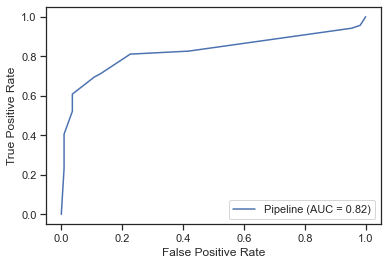

In [106]:
plot_roc_curve(model_default, X_test, y_test)

In [104]:
model_tuned = gridsearch.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tuned = model_tuned.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



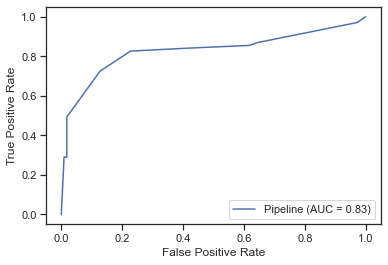

In [107]:
plot_roc_curve(model_tuned, X_test, y_test)

In [108]:
prob1 = model_default.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, prob1)
roc_df = pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'thr':thr})

In [109]:
roc_df

,fpr,tpr,thr
0,0.000000,0.000000,2.000000
1,0.009091,0.231884,1.000000
2,0.009091,0.333333,0.958904
3,0.009091,0.405797,0.950000
4,0.036364,0.521739,0.850746
5,0.036364,0.608696,0.823529
6,0.109091,0.695652,0.619048
7,0.127273,0.710145,0.600000
8,0.227273,0.811594,0.512821
9,0.236364,0.811594,0.500000


              precision    recall  f1-score   support

           0       0.84      0.58      0.69       110
           1       0.55      0.83      0.66        69

    accuracy                           0.68       179
   macro avg       0.70      0.70      0.68       179
weighted avg       0.73      0.68      0.68       179



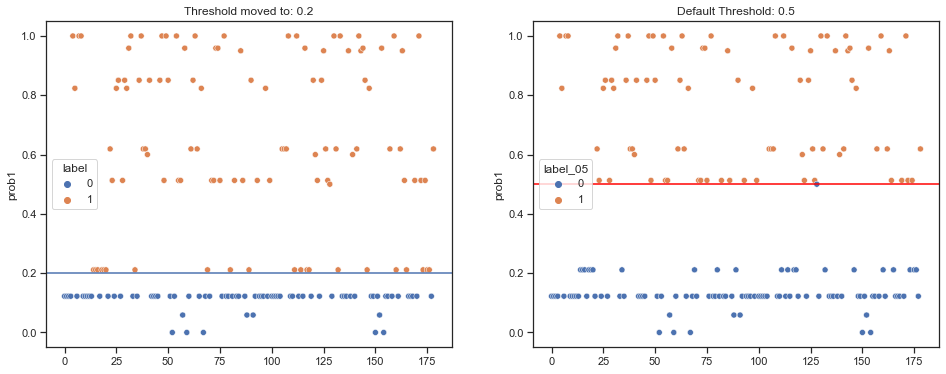

In [113]:
thr_move_to = 0.2
y_pred_thr = np.where(model_default.predict_proba(X_test)[:,1] > thr_move_to, 1, 0)
print(classification_report(y_test, y_pred_thr))

thr_test_df = pd.DataFrame(dict(zip(['label', 'prob1', 'label_05'], [y_pred_thr, model_default.predict_proba(X_test)[:,1], model_default.predict(X_test)])))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title(f'Threshold moved to: {thr_move_to}')
sns.scatterplot(x=thr_test_df.index, y=thr_test_df['prob1'], hue=thr_test_df['label'])
plt.axhline(thr_move_to)

plt.subplot(122)
plt.title('Default Threshold: 0.5')
sns.scatterplot(x=thr_test_df.index, y=thr_test_df['prob1'], hue=thr_test_df['label_05'])
plt.axhline(0.5, color='red')

plt.show()

## __DATA DEPLOYMENT__

In [114]:
X_train_val.head()

,pclass,sex,age,sibsp,parch,fare,embarked,title
125,3,male,12.0,1,0,11.2417,C,Master
885,3,female,39.0,0,5,29.1250,Q,Mrs
328,3,female,31.0,1,1,20.5250,S,Mrs
150,2,male,51.0,0,0,12.5250,S,Rev
887,1,female,19.0,0,0,30.0000,S,Miss


In [115]:
titanic[titanic['pclass'] == 1]['fare'].mean()

84.15468749999992

In [116]:
rose = [[1, 'female', 17, 1, 1, 85, 'S', 'Miss']]
model_default.predict(pd.DataFrame(rose, columns=X_train_val.columns))

array([1], dtype=int64)

In [131]:
jack = [[3, 'male', 20, 0, 0, 0, 'S', 'Mr']]
model_default.predict(pd.DataFrame(jack, columns=X_train_val.columns))

array([0], dtype=int64)